In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from glob import glob

import tensorflow as tf

In [3]:
# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# Data

In [5]:
data  = pd.read_pickle('../data/cleaned_df.pkl')
path = '../data/Flipkart/images/'
test_path = '../data/'

data_path = glob(path+'*/*.jp*')
data_test_path = glob(test_path+'*/*.jp*')

df = pd.DataFrame({
    "image_path": path+data['image'],
    "main_category": data['main_category'],
    "category_code": data['category_code']
}
)
df.head()


,image_path,main_category,category_code
0,../data/Flipkart/images/55b85ea15a1536d46b7190...,Home Furnishing,2
1,../data/Flipkart/images/7b72c92c2f6c40268628ec...,Baby Care,0
2,../data/Flipkart/images/64d5d4a258243731dc7bbb...,Baby Care,0
3,../data/Flipkart/images/d4684dcdc759dd9cdf4150...,Home Furnishing,2
4,../data/Flipkart/images/6325b6870c54cd47be6ebf...,Home Furnishing,2


In [6]:
df.groupby('category_code').count()

,image_path,main_category
category_code,,
0,150,150
1,150,150
2,150,150
3,150,150
4,150,150
5,150,150
6,150,150


# Implementation chek

## Pre-trained model

In [18]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [20]:
base_model = VGG16()
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


## Create images features

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [22]:
images_features = []
i=0
for img_path in df['image_path']:
    if i%100 == 0: print(i)
    i+=1
    image = load_img(img_path, target_size=(224, 224)) # Load the image
    image = img_to_array(image) # Convert the image to numpy array
    image = np.expand_dims(image, axis=0) # Add one more dimension to the image so that it can be fed to the model (Batch size)
    image = preprocess_input(image) # Preprocess the image as per model's requirement
    # Predict from pre-trained model
    images_features.append(model.predict(image, verbose=0)[0]) # [0] to get rid of the extra dimension

images_features = np.asarray(images_features) # Convert the list to numpy array
images_features.shape

0
100
200
300
400
500
600


/Users/ikusawalaetitia/Desktop/Desktop - Ikusawa’s Mac mini/work/projects/python/P6-txt-img_classification/p6env/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

## Dimensionality reduction and analysis

### PCA

In [23]:
from sklearn import decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.99) # retain 99% of variance
feat_pca = pca.fit_transform(images_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


### T-SNE

In [25]:
from sklearn import manifold
import time

start_time  = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=42)
X_tsne = tsne.fit_transform(feat_pca)

duration = time.time() - start_time
print(f"t-SNE took {round(duration,2)} seconds")

/Users/ikusawalaetitia/Desktop/Desktop - Ikusawa’s Mac mini/work/projects/python/P6-txt-img_classification/p6env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE took 2.63 seconds


/var/folders/4f/ml64c07d1zsg_jvvydhyltjr0000gn/T/ipykernel_54288/2220948810.py:5: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


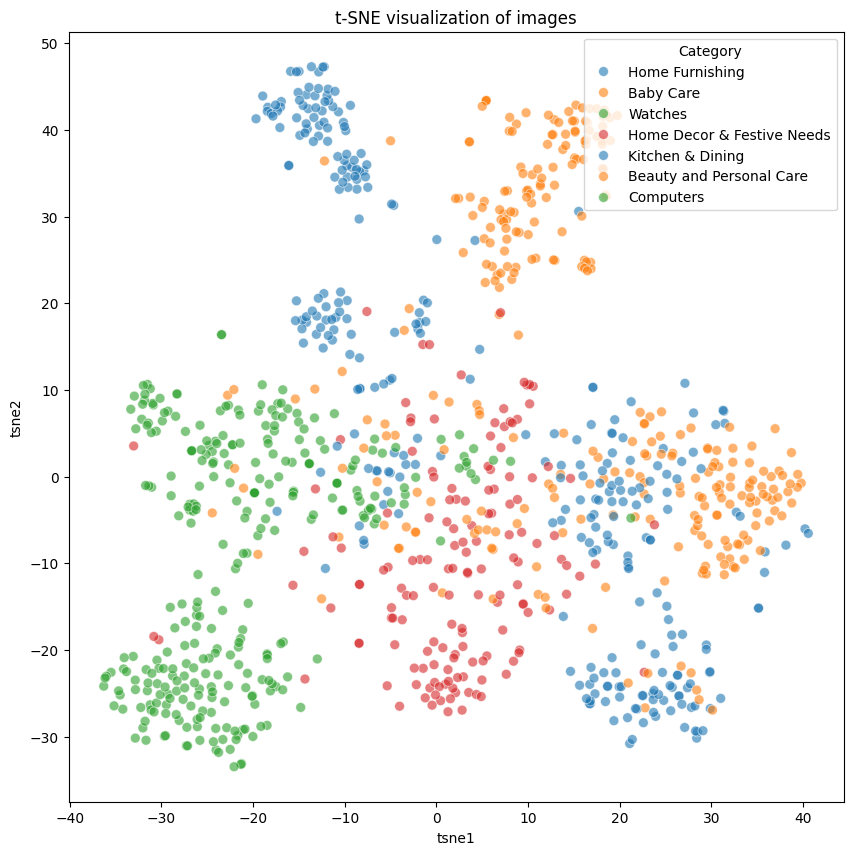

In [34]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne['labels'] = df['main_category']

plt.figure(figsize=(10,10))
sns.scatterplot(
    x='tsne1',
    y='tsne2',
    hue='labels',
    palette=sns.color_palette('tab10', n_colors=4),
    s=50,
    alpha=0.6,
    data=df_tsne,
    legend="brief"
)

plt.title('t-SNE visualization of images')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend(title='Category', loc='upper right')

plt.show()

It seems to be possible to separate automatically images according to their classes.

## Create clusters from T-SNE

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [35]:
cls = KMeans(n_clusters=len(df['category_code'].unique()), random_state=42)
cls.fit(X_tsne)

KMeans(n_clusters=7, random_state=42)

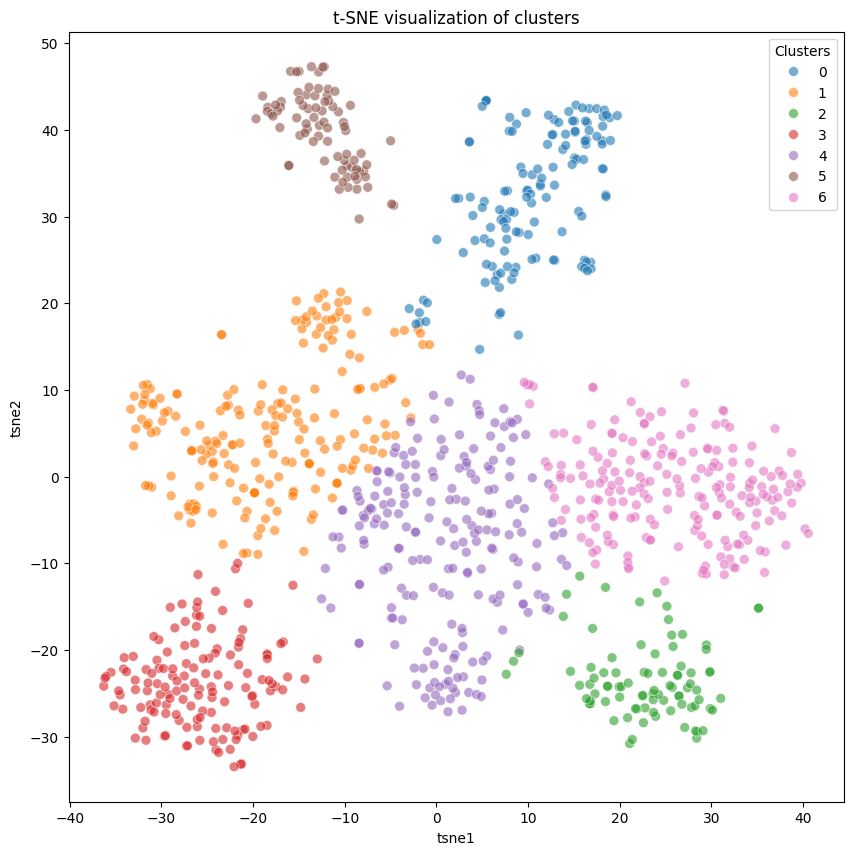

ARI score: 0.4864730292953567


In [37]:
df_tsne['cluster'] = cls.labels_

plt.figure(figsize=(10,10))
sns.scatterplot(
    x='tsne1',
    y='tsne2',
    hue='cluster',
    palette=sns.color_palette('tab10', n_colors=len(df['category_code'].unique())),
    s=50,
    alpha=0.6,
    data=df_tsne,
    legend="brief"
)

plt.title('t-SNE visualization of clusters')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend(title='Clusters', loc='upper right')

plt.show()

print(f'ARI score: {adjusted_rand_score(df_tsne["labels"], df_tsne["cluster"])}')

In [43]:
df_tsne.groupby('labels')['cluster'].value_counts().reset_index(name='count')
# 'Baby Care' categorized in 'Home Decor & Festive Needs' cluster (4)

idx_list = [i for i in range(len(df['image_path'])) if (df.iloc[i]['main_category'] == 'Baby Care') and (df_tsne.iloc[i]['cluster'] == 4)]
idx_list[0]

79

main_category                                            Baby Care
category_code                                                    5
image_path       ../data/Flipkart/images/320833ab08c9a94ef83520...
Name: 79, dtype: object


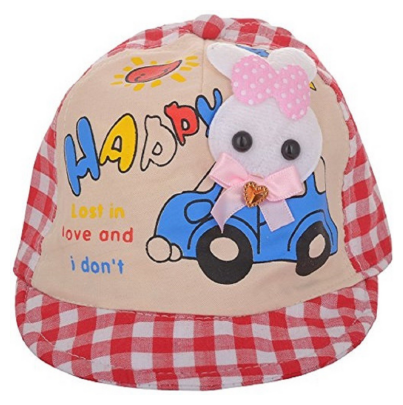

In [45]:
# Display the image

print(df.iloc[idx_list[0]])
fig = plt.figure(figsize=(5,5))
filename = df['image_path'][idx_list[0]]
img = plt.imread(filename)
plt.imshow(img)
plt.axis('off')
plt.show()

## Classes analysis

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
cm = confusion_matrix(df['category_code'], df_tsne['cluster'])
cm

array([[  0, 119,   0,   1,  29,   0,   1],
       [117,  10,   2,   0,  16,   1,   4],
       [  1,   9,   6,   4, 121,   0,   9],
       [  0,  13,   0, 135,   2,   0,   0],
       [ 10,  44,   0,   0,  17,  78,   1],
       [  4,   6,   8,   0,  20,   1, 111],
       [  0,   0,  71,   0,   4,   0,  75]])

In [52]:
def transform_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    mapping = np.argmax(cm, axis=0) # Get the index of the max value in each column
    print(f'Cluster to Category mapping: {mapping}')

    labels = pd.Series(y_true, name='y_true').to_frame() # Convert to DataFrame
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x: mapping[x]) # Transform the predicted labels

    return labels['y_pred_transform']

In [53]:
cluster_labels_transformed = transform_cm(df['category_code'], df_tsne['cluster'])
cm = confusion_matrix(df['category_code'], cluster_labels_transformed)
print(cm)
print(classification_report(df['category_code'], cluster_labels_transformed))

Cluster to Category mapping: [1 0 6 3 2 4 5]
[[119   0  29   1   0   1   0]
 [ 10 117  16   0   1   4   2]
 [  9   1 121   4   0   9   6]
 [ 13   0   2 135   0   0   0]
 [ 44  10  17   0  78   1   0]
 [  6   4  20   0   1 111   8]
 [  0   0   4   0   0  75  71]]
              precision    recall  f1-score   support

           0       0.59      0.79      0.68       150
           1       0.89      0.78      0.83       150
           2       0.58      0.81      0.67       150
           3       0.96      0.90      0.93       150
           4       0.97      0.52      0.68       150
           5       0.55      0.74      0.63       150
           6       0.82      0.47      0.60       150

    accuracy                           0.72      1050
   macro avg       0.77      0.72      0.72      1050
weighted avg       0.77      0.72      0.72      1050



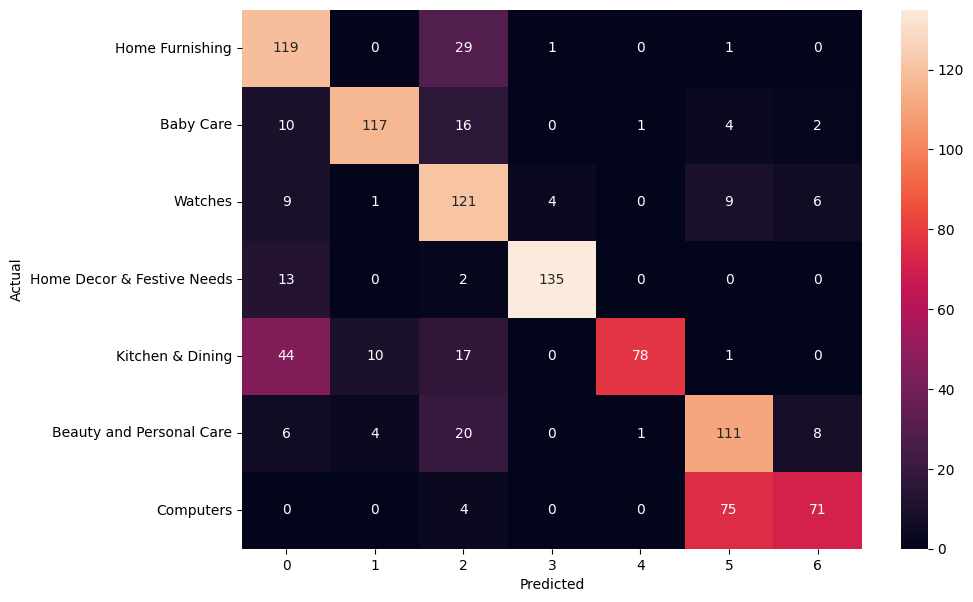

In [54]:
df_cm = pd.DataFrame(cm, index = [label for label in df['main_category'].unique()], columns = [i for i in "0123456"])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Supervised classification

## Data structure

In [10]:
import os
import shutil
import random

source_path = path
target_path = '../data/Flipkart/images_dataset/'
train_path = os.path.join(target_path, 'train')
test_path = os.path.join(target_path, 'test')

categories_labels = df['main_category'].unique()

# create directories for each category
for category in categories_labels:
    os.makedirs(os.path.join(train_path, category), exist_ok=True)
    os.makedirs(os.path.join(test_path, category), exist_ok=True)

# Counting the number of images in each category
train_cat_count = {category: 0 for category in categories_labels}
test_cat_count = {category: 0 for category in categories_labels}

# Splitting the images into train and test
for category in categories_labels:
    # get category images
    category_images = df[df['main_category'] == category]['image_path'].tolist()
    # shuffle the images
    random.shuffle(category_images)

    # 80% of images in train and 20% in test
    test_size = int(0.2 * len(category_images))

    # split the images
    train_images = category_images[test_size:]
    test_images = category_images[:test_size]

    # copy the images to the respective directories
    for img in train_images:
        shutil.copy(img, os.path.join(train_path, category))
        train_cat_count[category] += 1

    for img in test_images:
        shutil.copy(img, os.path.join(test_path, category))
        test_cat_count[category] += 1

# Show the number of images in each category
for category in categories_labels:
    print(f'{category}: Train: {train_cat_count[category]}, Test: {test_cat_count[category]}')

Home Furnishing: Train: 120, Test: 30
Baby Care: Train: 120, Test: 30
Watches: Train: 120, Test: 30
Home Decor & Festive Needs: Train: 120, Test: 30
Kitchen & Dining: Train: 120, Test: 30
Beauty and Personal Care: Train: 120, Test: 30
Computers: Train: 120, Test: 30


## Prepare train and test sets

In [102]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [121]:
X = df['image_path']
y = df['category_code']

# Split the dataset with equal distribution of classes with train, test val ratio of 80:10:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')
print(f'Val shape: {X_val.shape}')

Train shape: (840,)
Test shape: (105,)
Val shape: (105,)


In [126]:
train_count = np.unique(y_train, return_counts=True)
test_count = np.unique(y_test, return_counts=True)
val_count = np.unique(y_val, return_counts=True)

print(f'Train distribution: {train_count}')
print(f'Test distribution: {test_count}')
print(f'Val distribution: {val_count}')

Train distribution: (array([0, 1, 2, 3, 4, 5, 6]), array([120, 120, 120, 120, 120, 120, 120]))
Test distribution: (array([0, 1, 2, 3, 4, 5, 6]), array([15, 15, 15, 15, 15, 15, 15]))
Val distribution: (array([0, 1, 2, 3, 4, 5, 6]), array([15, 15, 15, 15, 15, 15, 15]))


## Create model

In [25]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [26]:
def create_model():
    # Load the pre-trained model
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

    # Freeze the layers
    for layer in base_model.layers:
        layer.trainable = False

    # Get the output of the last layer
    x = base_model.output
    # Complete the model
    x = GlobalAveragePooling2D()(x) # Global Average Pooling layer
    x = Dense(256, activation='relu')(x) # Adds 256 neurons with ReLU activation function to the model
    x = Dropout(0.5)(x) # Dropout layer with 0.5 probability of dropout rate to prevent overfitting
    predictions = Dense(len(df['category_code'].unique()), activation='softmax')(x) # Output layer with softmax activation function for multi-class classification problem (7 classes)

    # Finalize the model
    model = Model(inputs=base_model.input, outputs=predictions)
    # Compile the model
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    print(model.summary())

    return model


## Case 1 : preprocessing images without data augmentation

CF https://www.tensorflow.org/tutorials/load_data/images

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [110]:
def preprocess_image(images:pd.Series) -> np.array:
    """Preprocess the images and store them in a numpy array

    Args:
        images (pd.Series): list of image paths

    Returns:
        np.array: numpy array of preprocessed images
    """
    preprocessed_images = []
    for img_num in range(len(images)):
        image = load_img(
            images.iloc[img_num],
            target_size=(224, 224)
            ) # Load the image
        image = img_to_array(image) # Convert the image to numpy array
        image = image.reshape((image.shape[0], image.shape[1], 3)) # Reshape the image
        image = preprocess_input(image) # Preprocess the image as per model's requirement
        preprocessed_images.append(image)
    preprocessed_images = np.array(preprocessed_images) # Convert the list to numpy array

    return preprocessed_images

In [127]:
images_np = preprocess_image(X_train)
print(images_np.shape)
images_np_test = preprocess_image(X_test)
print(images_np_test.shape)

/Users/ikusawalaetitia/Desktop/Desktop - Ikusawa’s Mac mini/work/projects/python/P6-txt-img_classification/p6env/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(840, 224, 224, 3)
(105, 224, 224, 3)


In [128]:
# Create a model
with tf.device('/GPU:0'):
    model1 = create_model()

# Callbacks
model1_save_path1 = '../data/models/model1.h5'
# Save the best model based on validation loss value during training process (ModelCheckpoint)
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Stop the training process if the model is not learning anymore (EarlyStopping)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

callbacks_list = [checkpoint, es]

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [129]:
# transform the target labels to one hot encoded format
X_train = images_np
y_train = to_categorical(y_train, num_classes=len(df['category_code'].unique()))

X_test = images_np_test
y_test = to_categorical(y_test, num_classes=len(df['category_code'].unique()))



# train the model on train data
with tf.device('/GPU:0'):
    history1 = model1.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=64,
        callbacks=callbacks_list,
        verbose=1
    )

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3673 - loss: 8.5343
Epoch 1: val_loss improved from inf to 1.97798, saving model to ../data/models/model1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.3748 - loss: 8.3554 - val_accuracy: 0.7333 - val_loss: 1.9780
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6654 - loss: 2.4786
Epoch 2: val_loss improved from 1.97798 to 1.55729, saving model to ../data/models/model1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.6674 - loss: 2.4606 - val_accuracy: 0.7905 - val_loss: 1.5573
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7435 - loss: 1.5438
Epoch 3: val_loss improved from 1.55729 to 1.29944, saving model to ../data/models/model1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.7437 - loss: 1.5369 - val_accuracy: 0.7714 - val_loss: 1.2994
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8224 - loss: 0.9421
Epoch 4: val_loss improved from 1.29944 to 1.27156, saving model to ../data/models/model1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8214 - loss: 0.9452 - val_accuracy: 0.8000 - val_loss: 1.2716
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8197 - loss: 0.7650
Epoch 5: val_loss improved from 1.27156 to 1.14553, saving model to ../data/models/model1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8198 - loss: 0.7629 - val_accuracy: 0.7905 - val_loss: 1.1455
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8537 - loss: 0.6980
Epoch 6: val_loss did not improve from 1.14553
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8546 - loss: 0.6872 - val_accuracy: 0.8190 - val_loss: 1.1540
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9098 - loss: 0.3583
Epoch 7: val_loss did not improve from 1.14553
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9086 - loss: 0.3603 - val_accuracy: 0.8095 - val_loss: 1.1835
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8831 - loss: 0.4249
Epoch 8: val_loss did not improve from 1.14553
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8837 - loss: 0.4228 - val_accuracy: 0.8095 - val_loss: 1.3634
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8957 - loss: 0.3477
Epoch 9: val_loss improved from 1.14553 to 0.96617, saving model to

14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8962 - loss: 0.3454 - val_accuracy: 0.8095 - val_loss: 0.9662
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9377 - loss: 0.1875
Epoch 10: val_loss did not improve from 0.96617
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9375 - loss: 0.1868 - val_accuracy: 0.8286 - val_loss: 1.0986
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9523 - loss: 0.1402
Epoch 11: val_loss did not improve from 0.96617
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9523 - loss: 0.1403 - val_accuracy: 0.8286 - val_loss: 1.1050
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9513 - loss: 0.1424
Epoch 12: val_loss did not improve from 0.96617
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9511 - loss: 0.1435 - val_accuracy: 0.8286 - val_loss: 1.1901
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9353 - loss: 0.1889
Epoch 13: val_loss did not improve from 0.96617
14/14 ━━━━━━

In [130]:
# Last epoch loss and accuracy
loss, accuracy = model1.evaluate(X_train, y_train, verbose=1)
print(f'Loss: {loss}, Accuracy: {accuracy}')

loss, accuracy = model1.evaluate(X_test, y_test, verbose=1)
print(f'Loss: {loss}, Accuracy: {accuracy}')


27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 1.0000 - loss: 0.0059
Loss: 0.007136262021958828, Accuracy: 1.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7700 - loss: 1.3577
Loss: 1.1908719539642334, Accuracy: 0.800000011920929


In [131]:
# Best model loss and accuracy
model1.load_weights(model1_save_path1) # Load the best model

loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy}')

X_val = preprocess_image(X_val)
y_val = to_categorical(y_val, num_classes=len(df['category_code'].unique()))

loss, accuracy = model1.evaluate(X_val, y_val, verbose=0)
print(f'Validation Accuracy: {accuracy}')

Test Accuracy: 0.8095238208770752
Validation Accuracy: 0.7714285850524902


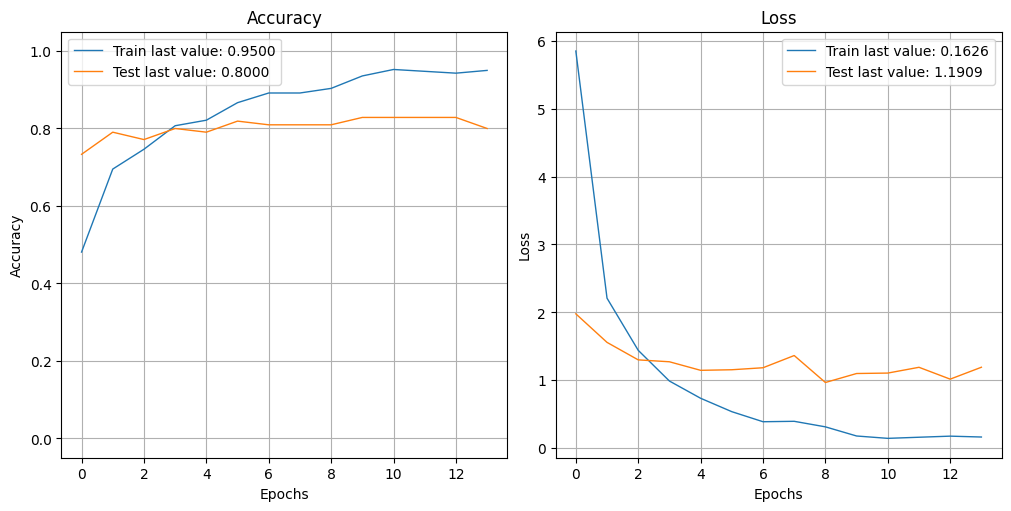

In [132]:
from plot_keras_history import plot_history, show_history

show_history(history1)
plot_history(history1)
plt.close()

In [133]:
y_test_num = np.argmax(y_test, axis=1)
y_test_pred = np.argmax(model1.predict(X_test), axis=1)
y_test_num = np.argmax(y_test, axis=1)

print(y_test_num)
print(y_test_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
[2 0 6 0 1 1 5 3 3 3 3 3 0 5 2 0 5 4 1 0 0 0 5 5 3 4 5 3 1 5 4 4 2 4 0 4 2
 0 6 6 5 1 4 4 2 2 1 2 1 3 1 1 4 6 6 1 6 2 2 2 6 0 5 5 4 5 2 4 1 6 6 6 1 0
 5 4 1 2 1 6 4 3 4 5 4 2 2 3 6 1 0 5 3 6 6 6 3 5 3 0 0 2 0 3 3]
[2 0 2 0 1 4 2 3 3 3 3 3 0 5 2 1 5 4 1 2 2 0 4 1 3 4 5 3 3 5 4 0 2 4 0 5 2
 0 6 6 5 1 4 4 2 2 3 2 1 3 1 1 4 5 6 2 6 2 3 2 6 0 5 6 4 5 2 4 0 6 6 6 1 0
 2 4 1 2 1 6 4 3 4 5 4 2 2 3 6 1 0 5 3 2 5 6 3 5 3 0 0 2 0 3 3]


In [134]:
cm = confusion_matrix(y_test_num, y_test_pred)
print(cm)

[[12  1  2  0  0  0  0]
 [ 1 10  1  2  1  0  0]
 [ 0  0 14  1  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 1  0  0  0 13  1  0]
 [ 0  1  2  0  1 10  1]
 [ 0  0  2  0  0  2 11]]


In [135]:
y_test_pred_transformed = transform_cm(y_test_num, y_test_pred)
cm = confusion_matrix(y_test_num, y_test_pred_transformed)
print(cm)

print(classification_report(y_test_num, y_test_pred_transformed))

Cluster to Category mapping: [0 1 2 3 4 5 6]
[[12  1  2  0  0  0  0]
 [ 1 10  1  2  1  0  0]
 [ 0  0 14  1  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 1  0  0  0 13  1  0]
 [ 0  1  2  0  1 10  1]
 [ 0  0  2  0  0  2 11]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.83      0.67      0.74        15
           2       0.67      0.93      0.78        15
           3       0.83      1.00      0.91        15
           4       0.87      0.87      0.87        15
           5       0.77      0.67      0.71        15
           6       0.92      0.73      0.81        15

    accuracy                           0.81       105
   macro avg       0.82      0.81      0.81       105
weighted avg       0.82      0.81      0.81       105



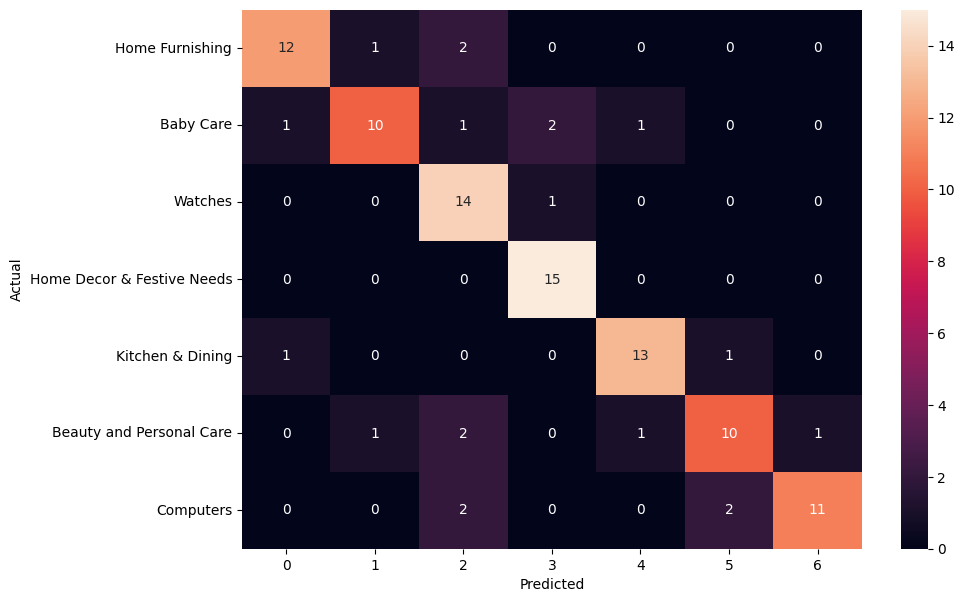

In [136]:
df_cm = pd.DataFrame(cm, index = [label for label in df['main_category'].unique()], columns = [i for i in "0123456"])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Case 2: Data augmentation

CF https://www.tensorflow.org/tutorials/images/data_augmentation

In [30]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, Sequential

In [14]:
def create_image_dataset(path:str, validation_split:int=0, data_type=None) -> tf.data.Dataset:
    """Create image dataset from the directory

    Args:
        path (str): path to the directory
        validation_split (int, optional): validation split ratio. Defaults to 0.
        data_type ([type], optional): type of data. Defaults to None.

    Returns:
        tf.data.Dataset: image dataset
    """
    dataset = image_dataset_from_directory(
        path,
        labels='inferred',
        label_mode='categorical',
        batch_size=32,
        image_size=(224, 224),
        validation_split=validation_split,
        subset=data_type,
        seed=42
    )
    return dataset

In [17]:
print('Training dataset')
train_dataset = create_image_dataset(train_path, validation_split=0.2, data_type='training')
print('----------------')
print('Validation dataset')
val_dataset = create_image_dataset(train_path, validation_split=0.2, data_type='validation')
print('----------------')
print('Test dataset')
test_dataset = create_image_dataset(test_path)

Training dataset
Found 840 files belonging to 7 classes.
Using 672 files for training.
----------------
Validation dataset
Found 840 files belonging to 7 classes.
Using 168 files for validation.
----------------
Test dataset
Found 210 files belonging to 7 classes.


In [18]:
def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32) # Cast the image to float32
    image = tf.image.resize(image, (224, 224)) # Resize the image
    image = image / 255.0 # Rescale the image
    return image, label

In [22]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

In [31]:
def create_model_with_data_aug():
    # Data augmentation
    data_augmentation = tf.keras.Sequential([
        RandomFlip('horizontal'),
        RandomRotation(0.2),
        RandomZoom(0.1),
    ])

    # Load the pre-trained model
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    # Freeze the layers
    for layer in base_model.layers:
        layer.trainable = False

    # Define the new model
    model = Sequential([
        data_augmentation, # Data augmentation layer
        Rescaling(1./127.5, offset=-1), # Rescale the image to [-1, 1]
        base_model, # Pre-trained model
        GlobalAveragePooling2D(), # Global Average Pooling layer to reduce the number of parameters and computations in the network by averaging the spatial dimensions of the previous layer and outputting a single 2D tensor per feature map (channel)
        Dense(256, activation='relu'), # Adds 256 neurons with ReLU activation function to the model
        Dropout(0.5), # Dropout layer with 0.5 probability of dropout rate to prevent overfitting
        Dense(len(df['category_code'].unique()), activation='softmax') # Output layer with softmax activation function for multi-class classification problem (7 classes)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(model.summary())

    return model

In [33]:
# Create VGG16 model
with tf.device('/GPU:0'):
    model2 = create_model_with_data_aug()

# Callbacks
model2_save_path = '../data/models/model2.h5'
# Save the best model based on validation loss value during training process (ModelCheckpoint)
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Stop the training process if the model is not learning anymore (EarlyStopping)
callbacks_list = [checkpoint, es]

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

None
